# Messung von Materie-Antimaterie Unterschieden mit dem LHCb-Experiment

![](http://lhcb-public.web.cern.ch/lhcb-public/en/LHCb-outreach/multimedia/LHCbDetectorpnglight1.png)

# Einführung
### Drückt den grauen Pfeil um den jeweiligen Abschnitt zu erweitern

<b> Willkommen zu dem E5a FP2 Teilchenphysik Versuch mit LHCb Open Data</b>

<div align="justify"> Dieses Notebook hilft euch die vom Large Hadron Collider (LHC) am Cern aufgezeichneten Daten zu analysieren. Das Ziel eurer Analyse ist es einen Unterschied im Verhalten von Materie und [Antimaterie](https://en.wikipedia.org/wiki/Antimatter) sichtbar zu machen. Dieser Versuch soll euch in die Lage bringen selber eine Datenanalyse durchzuführen auf einem zu der aktuellen CERN Forschung ähnlichem Niveau. Dabei wird keine tiefergehende Kenntnis der Teilchenphysik vorausgesetzt.
    


# Erste Schritte

## Ziele:
* Vertraut Werden mit der Programmier-Hilfe
* Simulierte Daten einlesen
____

<div align="justify"> Wie Forscher am CERN werdet ihr euren eigenen Code für die Analyse schreiben. Dazu soll die Programmiersprache Python verwendet werden. Es werden jedoch keine vorherigen Kenntnisse dieser Sprache vorausgesetzt, da bei den Aufgaben Hinweise und Beispiele zu finden sein werden. Sollten euch diese dennoch nicht aurreichen, findet ihr möglicherweise [Python Tutorials](http://www.tutorialspoint.com/python/) hilfreich.

Eine große Hilfe für das Schreiben des Python Codes kann eine [Analyse von Nobelpreisträgern](Example-Analysis.ipynb) sein. Diese Analyse verwendet sehr ähnliche Techniken, wie sie für diesen Versuch benötigt werden.
Das Lesen und Verstehen des entsprechenden Codes sollte daher diesen Versuch deutlich einfacher gestalten.

WICHTIG: Jede der folgenden Code-Boxen wird ausgeführt, indem Shift+Enter gedrückt wird, nachdem die Box ausgewählt worden ist.
Wenn `In [x]:` durch `In [*]:` ersetzt wird, bedeutet dies, dass der Code der entsprechenden Box gerade läuft.


## Einlesen der simulierten Daten

Um anzufangen und die Funktion des ersten Codes zu überprüfen ist es sinnvoll mit der Analyse von simulierten anstelle von echten Daten zu beginnen. Echte Daten enthalten sowohl Ereignisse der Art, die untersucht werden sollen, also Signal, als auch andere ähnliche Ereignisse als Untergrund. Darüber hinaus unterliegen echte Daten verschiedenen Effekten der Detektorauflösung.
Die hier zur Verfügung gestellten simulierten Daten hingegen enthalten auschließlich von einem perfekten Detektor aufgezeichnete Signalereignisse.

In [144]:
from __future__ import print_function
from __future__ import division

%pylab inline
# Setup the notebook

import functools
import os
import warnings
from subprocess import check_output

import numpy
from ipywidgets import interact
import pandas
from root_pandas import read_root
from scipy import stats as st
from matplotlib import pyplot as plt


warnings.filterwarnings("ignore")
rcParams['image.cmap'] = 'Blues'  # change default colormap
pandas.set_option('display.max_columns', None)


Populating the interactive namespace from numpy and matplotlib


Falls ihr Hilfe benötigt, werft einen Blick in den [Beispiel Code](Example-Analysis.ipynb), in die Hinweise in jedem Abschnitt, in die Funktionsübersicht in eurer Anleitung oder fragt euren Betreuer.

In [145]:
# Let us now load the simulated data
sim_data = read_root('/data/PhaseSpaceSimulation.root')

<div align="justify">
Jetzt, wo ihr Zugang zu den Daten habt, könnt ihr eine Vielzahl an Funktionen nutzen um die Daten zu analysieren. Diese Funktionen stammen aus den Bilbliotheken, die ihr am Anfang geladen habt. Versucht eine Tabelle mit Informationen aus euren Daten zu erstellen um eine Übersicht über die typischen Werte für die verschiedenen Variablen zu bekommen. Die Kenntnis über die jeweiligen Wertebereiche wird euch später beim Plotten der Daten helfen.</div>

Die Daten enthalten Informationen von Ereignissen, die vom Detektor aufgezeichnet worden sind. Ein Ereignis umfasst dabei die Teilchen, die in der Kollision zweier Protonenpakete enstanden sind. Stellt man sich die Daten als Tabelle vor, so beschreibt jede Zeile ein einzelnes Ereignis und jede Spalte eine gemessene Größe. 

Bei diesem Versuch sollt ihr die Zerfälle von, als B<sup>+</sup> und B<sup>-</sup> Mesonen bekannten, Teilchen in drei Kaonen (K<sup>+</sup> oder K<sup>-</sup>) untersuchen. Die euch zur Verfügung gestellten Daten enthalten Ereignisse, bei denen dieser Zerfall stattgefunden haben könnte. Dabei sind Detektorinformationen genutzt worden um Spuren von möglichen Kaonen zu rekonstruieren. Die Daten enthalten den gemessenen Impuls, die Ladung und einen Wert für die Wahrscheinlichkeit zu einem Kaon zu gehören für jede Spur. Dabei enthält jedes Ereignis in den Daten jeweils drei rekonstruierte Spuren, die aus dem Zerfall eines B<sup>+</sup> or B<sup>-</sup> Meson stammen könnten. Eine Übersicht über die in den Daten enthaltenen Informationen kann der Anleitung entnomen werden.

In [146]:
# make a table of the data variables here 
sim_data.head(10)

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,H2_PX,H2_PY,H2_PZ,H2_ProbK,H2_ProbPi,H2_Charge,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon
0,0.0,1.0,3551.84,1636.96,23904.14,1.0,0.0,-1,1.0,0,41507.15,15980.59,331663.64,1.0,0.0,1,1.0,0,36100.40,16546.83,295600.61,1.0,0.0,-1,1.0,0
1,0.0,1.0,-2525.98,-5284.05,35822.00,1.0,0.0,1,1.0,0,-43182.91,-96553.03,585289.31,1.0,0.0,-1,1.0,0,-8648.32,-16617.56,98535.13,1.0,0.0,-1,1.0,0
2,0.0,1.0,-700.67,1299.73,8127.76,1.0,0.0,-1,1.0,0,-1411.99,3550.96,16120.27,1.0,0.0,1,1.0,0,-13483.34,10860.77,79787.59,1.0,0.0,1,1.0,0
3,0.0,1.0,3364.63,1397.30,222815.29,1.0,0.0,1,1.0,0,2192.42,1369.87,161924.75,1.0,0.0,-1,1.0,0,1925.16,-551.12,40420.96,1.0,0.0,1,1.0,0
4,0.0,1.0,-581.66,-1305.24,22249.59,1.0,0.0,-1,1.0,0,1153.05,-1998.17,66134.22,1.0,0.0,1,1.0,0,-2820.04,-8305.43,250130.00,1.0,0.0,-1,1.0,0
5,0.0,1.0,112.84,-13297.98,51882.87,1.0,0.0,1,1.0,0,633.73,-11780.81,47958.42,1.0,0.0,-1,1.0,0,-440.95,-13699.42,71163.14,1.0,0.0,-1,1.0,0
6,0.0,1.0,5558.97,3913.52,56981.08,1.0,0.0,-1,1.0,0,11089.66,1397.50,109263.13,1.0,0.0,1,1.0,0,3457.70,780.13,28716.94,1.0,0.0,1,1.0,0
7,0.0,1.0,-15208.03,-1783.93,265210.55,1.0,0.0,1,1.0,0,-24255.68,-7517.57,456380.08,1.0,0.0,-1,1.0,0,-4478.67,-164.39,71498.09,1.0,0.0,1,1.0,0
8,0.0,1.0,-109.04,8239.25,191486.94,1.0,0.0,-1,1.0,0,-1753.20,13993.55,276938.27,1.0,0.0,1,1.0,0,-2083.59,11359.35,192297.67,1.0,0.0,-1,1.0,0
9,0.0,1.0,15175.26,93142.09,379269.30,1.0,0.0,1,1.0,0,10114.28,51687.31,219125.26,1.0,0.0,-1,1.0,0,3295.84,24950.02,105990.48,1.0,0.0,-1,1.0,0


### Hinweise

**Erstellen einer Tabelle** - Use your `head()` - und vergesst nicht in den [Beispiel Code](Example-Analysis.ipynb) zu sehen um zu erfahren, wie dort bestimmmte Sachen umgesetzt wurden.

# Rekonstruktion der invarianten Masse

## Ziele:
* Plottet ein Histogram mit dem Impuls eines Kaon Kandidaten
* Berechnet die Energie eines jeweiligen Kaon Kandidaten
* Plottet die invariante Masse der B<sup>+</sup> / B<sup>-</sup> Mesonen

### Plotten eines Features:
Ihr könnt jedes in den Daten enthaltenes Feature in ein Histogram plotten. Dabei kann das Binning beliebig gewählt werden. Achtet darauf ein geeignetes Binning zu verwenden, bei dem die Verteilung der Variable gut erkennbar ist. Versucht nun die x-Komponente vom Impuls des ersten Kaon Kandidaten (`H1_PX`) zu plotten.



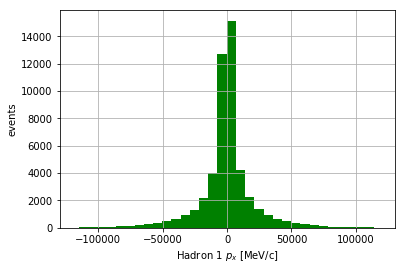

In [147]:
# make a histogram of the H1_PX variable here
sim_px_hist = sim_data['H1_PX'].hist(bins=50, color='g')
plt.xlim(-130000,130000)
xlabel(r'Hadron 1 $p_x$ [MeV/c]')
ylabel('events')
plt.savefig('sim_px_hist.png')

Der Impuls ist eine **vektorielle** Größe und hat eine x-, y- und z-Komponente. Vergleicht die Verteilungen der verschiedenen Impulskomponenten.
Berechnet anschließend den Betrag des Impulses vom ersten Kaon und plottet ihn als Histogramm. (Dafür werdet ihr die Variablen `H1_PX`, `H1_PY` und `H1_PZ` benötigen)


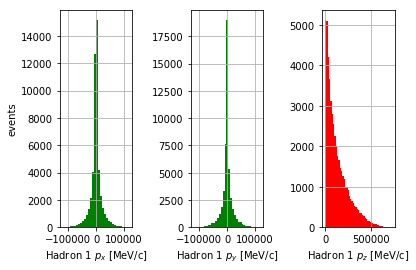

In [148]:
# make a histogram of the H1_PX, H1_PY and H1_PZ variables here
plt.subplot(1,3,1)
plt.subplots_adjust(wspace=0.8)
sim_px_hist = sim_data['H1_PX'].hist(bins=50, color='g')
plt.xlim(-130000,130000)
xlabel(r'Hadron 1 $p_x$ [MeV/c]')
ylabel('events')
plt.subplot(1,3,2)
sim_px_hist = sim_data['H1_PY'].hist(bins=50, color='g')
plt.xlim(-130000,130000)
xlabel(r'Hadron 1 $p_y$ [MeV/c]')
#ylabel('events')
plt.subplot(1,3,3)
sim_px_hist = sim_data['H1_PZ'].hist(bins=50, color='r')
xlabel(r'Hadron 1 $p_z$ [MeV/c]')
#ylabel('events')
plt.savefig('sim_pall_hist.png')

In [149]:
# calculate a variable for the magnitude of the momentum of the first kaon 
sim_data['H1_P'] = np.sqrt(sim_data['H1_PX']**2 + sim_data['H1_PY']**2 + sim_data['H1_PZ']**2)
sim_data.head()

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,H2_PX,H2_PY,H2_PZ,H2_ProbK,H2_ProbPi,H2_Charge,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon,H1_P
0,0.0,1.0,3551.84,1636.96,23904.14,1.0,0.0,-1,1.0,0,41507.15,15980.59,331663.64,1.0,0.0,1,1.0,0,36100.40,16546.83,295600.61,1.0,0.0,-1,1.0,0,24221.955218
1,0.0,1.0,-2525.98,-5284.05,35822.00,1.0,0.0,1,1.0,0,-43182.91,-96553.03,585289.31,1.0,0.0,-1,1.0,0,-8648.32,-16617.56,98535.13,1.0,0.0,-1,1.0,0,36297.623109
2,0.0,1.0,-700.67,1299.73,8127.76,1.0,0.0,-1,1.0,0,-1411.99,3550.96,16120.27,1.0,0.0,1,1.0,0,-13483.34,10860.77,79787.59,1.0,0.0,1,1.0,0,8260.794099
3,0.0,1.0,3364.63,1397.30,222815.29,1.0,0.0,1,1.0,0,2192.42,1369.87,161924.75,1.0,0.0,-1,1.0,0,1925.16,-551.12,40420.96,1.0,0.0,1,1.0,0,222845.073179
4,0.0,1.0,-581.66,-1305.24,22249.59,1.0,0.0,-1,1.0,0,1153.05,-1998.17,66134.22,1.0,0.0,1,1.0,0,-2820.04,-8305.43,250130.00,1.0,0.0,-1,1.0,0,22295.430810


### Hinweise

**Histogramm plotten** - Ihr könnt die `hist()` Funktion nutzen. Mit den Parametern `bins(n)`und `range(x,y)`könnt ihr das Binning und den Bereich des Histogramms festlegen.


## Energie und Masse

Einsteins Spezielle Relativitätstheorie verknüpft Energie, Masse und Impuls.
Der Impuls der Kaon Kandidaten wird vom Detektor gemessen (Eine Komponente und den Betrag habt ihr bereits geplottet). Die invariante Masse des Kaon ist gut bekannt und kann recherchiert werden. Aus diesen Größen könnt ihr nun die Energie der drei Kaonen berechnen.   


<center> $E^2 = p^2 + m^2$ </center>

In [150]:
# calculate the energy of the first kaon
Minv_Kaon = 493.677 #PDG als Quelle
sim_data['H1_E'] = np.sqrt(sim_data['H1_P']**2 + Minv_Kaon**2)

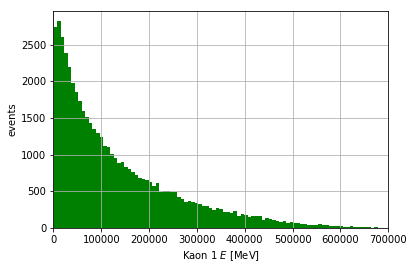

In [151]:
# plot a histogram of this variable
sim_E_K1 = sim_data['H1_E'].hist(bins=100, color='g')
plt.xlim(0,700000)
xlabel(r'Kaon 1 $E$ [MeV]')
ylabel('events')
plt.savefig('sim_Kaon1_E.png')

### Hinweise

**Energie Berechnung** - Nutzt den zuvor bestimmten Betrag des Impulses und die bekannte invariante Masse um die Energie des ersten Hadrons. Berechnet zunächst das Quadrat der Energie und dann die Energie.

**Kaon Masse** - Ihr könnt die Masse des Kaon im Internet oder in Büchern recherchieren. Eine in der Teilchenphysi häufig genutzte Referenz ist beispielsweise die Particle Data Group ([PDG](http://pdg.lbl.gov/2014/reviews/rpp2014-rev-charged-kaon-mass.pdf)). Dort sind alle Kenntnisse über die Eigenschaften der bekannten Teilchen gesammelt.


Berechnet nun auch die Impulse und Energien der beiden übrigen Kaonen.


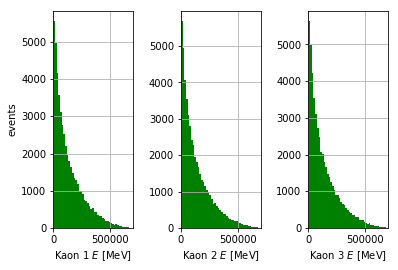

In [152]:
# calculate variables for the energy of the other two kaons
sim_data['H2_P'] = np.sqrt(sim_data['H2_PX']**2 + sim_data['H2_PY']**2 + sim_data['H2_PZ']**2)
sim_data['H3_P'] = np.sqrt(sim_data['H3_PX']**2 + sim_data['H3_PY']**2 + sim_data['H3_PZ']**2)
sim_data['H2_E'] = np.sqrt(sim_data['H2_P']**2 + Minv_Kaon**2)
sim_data['H3_E'] = np.sqrt(sim_data['H3_P']**2 + Minv_Kaon**2)

plt.subplot(1,3,1)
plt.subplots_adjust(wspace=0.6)
sim_px_hist = sim_data['H1_E'].hist(bins=50, color='g')
plt.xlim(0,700000)
xlabel(r'Kaon 1 $E$ [MeV]')
ylabel('events')
plt.subplot(1,3,2)
sim_px_hist = sim_data['H2_E'].hist(bins=50, color='g')
plt.xlim(0,700000)
xlabel(r'Kaon 2 $E$ [MeV]')
plt.subplot(1,3,3)
sim_px_hist = sim_data['H3_E'].hist(bins=50, color='g')
plt.xlim(0,700000)
xlabel(r'Kaon 3 $E$ [MeV]')
plt.savefig('sim_Eall_hist.png')

## Weitere Feature des $B$ Meson

In dieser Analyse werden  B<sup>+</sup> und B<sup>-</sup> Mesonen ([B Meson](https://en.wikipedia.org/wiki/B_meson)) untersucht,  die in drei geladene Kaonen [Kaon](https://en.wikipedia.org/wiki/Kaon) zerfallen.

Energie ist eine erhaltenen Größe. Daraus folgt, dass ihr die Energie der drei "Tochter"-Kaonen, die ihr zuvor berechnet habt, verwenden könnt um die des B Meson zu bestimmen.

Ebenso ist der Impuls eine erhaltene Größe. Daher könnt ihr auch aus den Impuls des B Meson aus den Impulsen der Töchter bestimmen. Beachtet, dass der Impuls eine **verktorielle** Größe ist.

Aus der Energie und dem Impuls kann unter erneuter Verwendung der Energie-Impuls Relation die invariante Masse des B Meson ermittelt werden.


In [153]:
# calculate the energy of the B meson
sim_data['B_E'] = sim_data['H1_E'] + sim_data['H2_E'] + sim_data['H3_E']

In [154]:
# calculate the momentum components of the B meson 
sim_data['B_PX'] = sim_data['H1_PX'] + sim_data['H2_PX'] + sim_data['H3_PX'] 
sim_data['B_PY'] = sim_data['H1_PY'] + sim_data['H2_PY'] + sim_data['H3_PY'] 
sim_data['B_PZ'] = sim_data['H1_PZ'] + sim_data['H2_PZ'] + sim_data['H3_PZ'] 
# and the magnitude of the momentum of the B meson
sim_data['B_P'] = np.sqrt(sim_data['B_PX']**2 + sim_data['B_PY']**2 + sim_data['B_PZ']**2) 

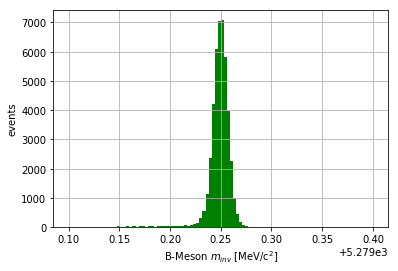

In [155]:
# calculate the B meson invariant mass
sim_data['B_M'] = np.sqrt(sim_data['B_E']**2 - sim_data['B_P']**2)
# plot the B meson invariant mass in a histogram
sim_M_B = sim_data['B_M'].hist(bins=100, color='g', range=(5279.1,5279.4))
xlabel(r'B-Meson $m_{inv}$ [MeV/c$^2$]')
#plt.xlim(5200,5300)
ylabel('events')
plt.savefig('sim_Bmes_M.png')

Ihr solltet nun einen Graphen mit einem scharfen Peak bei der Masse der B<sup>+</sup> Mesonen haben. Die Masse der B<sup>+</sup> und der B<sup>-</sup> Mesonen ist identisch. Vergleicht die Position des Peaks mit der bekannten [B Masse](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf)

Bedenkt, dass für diesen Plot simulierte Daten verwendet worden sind. Welche Unterschiede erwartet ihr für die realen Daten, mit denen ihr im Folgenden arbeiten werdet?

### Hinweise

**B Meson Energie** - Aus der Energieerhaltung folgt, dass die Energie des B Meson der Summe der Energien von den drei Kaonen entspricht: $E_B=E_{K1}+E_{K2}+E_{K3}$, mit der B Meson Energie $E_B$ und den Energien $E_{K1}, E_{K2}, E_{K3}$ der drei Kaonen.

**B Meson Impuls** - Aus der Impulserhaltung folgt, dass die x-Komponente B Meson Impulses der Summer der x-Komponenten der drei Kaon Impulse entspricht: $px_B=px_{K1}+px_{K2}+px_{K3}$, wobei $px$ der Impuls des B Meson in x-Richtung ist und $px_{K1},px_{K2},px_{K3}$ die x-Komponenten der drei Kaon Impulsen ist. Das selbe gilt auch für die y- und z-Komponente. Aus den einzelnen Richtungskomponenten des Impulses lässt sich anschließend der Betrag des B Meson Impuleses ermitteln.

**Invariante B Meson Masse** - Umstellen der Gleichung $E^2=p^2+m^2$ liefert $m^2$. Aus dem Betrag des Impulses und der Energie lässt sich nun die invariante Masse des B Meson ermitteln.

**Histogrammieren** - Achtet darauf, dass der Wertebereich und das Binning so gewählt sind, dass ihr den Massen Peak gut erkennen könnt.

**Einheiten** - Die gegebenen Daten verwenden die Einheit 'MeV/c' für die Impulse.

# Echte Daten
## Ziele:

* Sortiert die Daten aus, die nicht aus dem Zerfall B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> oder dem konjugierten Zerfall B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> stammen

* Plottet ein Histogramm der B Masse aus den echten Daten und beobachtet, wie unterschiedliche Selektionen diese beeinflussen

In dem vorherigen Abschnitt habt ihr simulierte Daten verwendet um die die invariante Masse zu bestimmen. Jetzt werdet ihr echte LHCb Daten verwenden. Diese wurden 2011 während der ersten wesentlichen Betriebsphase des LHC aufgenommen.

Die vorhandenen Daten sind so ausgewählt, dass sie mit hoher Wahrscheinlichkeit aus Zerfällen von B<sup>+</sup> oder B<sup>-</sup> in drei geladene Endzustandsteilchen stammen. Zunächst soll sich mit Fall mit drei geladenen Kaonen im Endzustand betrachtet werden.


## Vorselektion
Nun müsst ihr durch eine Vorselektion Daten auswählen, die mit hoher Wahrscheinlichkeit drei Kaonen im Endzustand aufweisen. Dazu müsst ihr:
* Sicher gehen, dass es keine Myonen sind (nutzt `H1_isMuon` und entsprechendes für `H2` und `H3`)
* Fordern, dass die Wahrscheinlichkeit ein Pion zu sein gering ist (z.B. `H1_ProbPi < 0.5`)
* Fordern, dass die Wahrscheinlichkeit ein Kaon zu sein hoch ist (z.B. `H1_ProbK > 0.5`)

Bei eurer Selektion müsst ihr die Balance halten zwischen zu losen Schnitten mit zu vielen Untergrundereignissen und zu festen Schnitten, die zu viel von eurem Signal verwerfen.
Falls ihr im späteren Verlauf der Analyse feststellt, dass eure Selektion unzureichend ist, könnt ihr jeder Zeit hierhin zurückkehren und eure Selektion anpassen.

Stellt nun eure Vorselektion auf und gebt ihr den Namen `'preselection'`. Ein Beispiel einer möglichen Vorselektion befindet sich in den Hinweisen. Falls ihr zunächst unsicher seid, könnt ihr mit dieser beginnen und sie anpassen, sobald ihr euch mit den folgenden Plots und dem Einfluss der Selektion vertraut gemacht habt.



In [156]:
# Make your preselection here, this line applies no preselection
preselection = "H1_isMuon == 0 & H2_isMuon == 0 & H3_isMuon == 0 & H1_ProbPi < 0.5 & H2_ProbPi < 0.5 & H3_ProbPi < 0.5 & H1_ProbK > 0.5 & H2_ProbK > 0.5 & H3_ProbK > 0.5"
#Warum nicht real_data['...']?

Der folgende Code lädt die echten Daten in ein neues Dataframe und wendet die Vorselektion `'preselection'` an. Das Laden der Daten kann dabei, aufgrund der Größe, etwas länger dauern.

In [157]:
real_data = read_root(['/data/B2HHH_MagnetUp.root','/data/B2HHH_MagnetDown.root'],where=preselection)
real_data.head()

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,H2_PX,H2_PY,H2_PZ,H2_ProbK,H2_ProbPi,H2_Charge,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon
0,10.428140,4.056947,-4168.055539,-704.953919,24548.766576,0.771199,0.051726,-1,1002.657075,0,-3393.636093,-706.874508,19358.787446,0.917991,0.038719,1,714.174519,0,-8864.962492,-7428.640292,77446.175923,0.934580,0.128720,1,536.585115,0
1,33.591307,2.220242,1295.910334,-61.956920,35569.606902,0.932006,0.058690,-1,6672.092707,0,613.484785,464.017357,17701.755537,0.515930,0.043657,1,737.219732,0,-341.750434,3317.423370,24380.200353,0.968883,0.129317,1,23332.453390,0
2,16.531858,11.593388,1493.048615,1944.600925,33003.915368,0.953512,0.104768,-1,1731.923563,0,373.613994,843.614548,30062.084752,0.868579,0.039157,1,499.998835,0,4779.029220,-287.829864,53908.496894,0.844950,0.064803,1,3484.193030,0
3,4.102797,11.321708,-236.694032,843.809179,28207.109021,0.655129,0.045339,-1,5.033764,0,-561.905858,-189.352668,30100.030163,0.601544,0.040908,1,6.588705,0,-1085.332141,-3076.759324,30036.196827,0.912293,0.080841,1,489.046805,0
4,3.509346,5.739399,123.873807,856.290459,51956.566616,0.940484,0.078221,-1,7.005894,0,110.753386,1070.975864,24974.211721,0.920603,0.041739,1,2.090424,0,1639.997962,2660.275891,19441.349314,0.702135,0.028641,1,888.535134,0


Erzeugt nun ein Histogramm für die Wahrscheinlichkeiten, dass ein Endzustandsteilchen ein Kaon oder Pion ist.
Dies wird euch dabei helfen geeignete Schnittpunkte für die Selektion zu finden.

Ihr könnt auch verschiedene tiefergehende Ansätze verfolgen wie 2d Histogramme der Wahrscheinlichkeiten oder unterschiedliche Schnittpunkte für verschiedene Endzustandsteilchen.

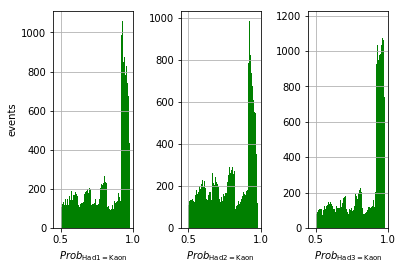

In [158]:
# plot the probability that a final state particle is a kaon
plt.subplot(1,3,1)
plt.subplots_adjust(wspace=0.6)
real_probK1 = real_data['H1_ProbK'].hist(bins=100, color='g')
plt.xlim(0.45,1)
xlabel(r'$Prob_\mathrm{Had1=Kaon}$')
ylabel('events')
plt.subplot(1,3,2)
real_probK2 = real_data['H2_ProbK'].hist(bins=100, color='g')
plt.xlim(0.45,1)
xlabel(r'$Prob_\mathrm{Had2=Kaon}$')
plt.subplot(1,3,3)
real_probK3 = real_data['H3_ProbK'].hist(bins=100, color='g')
plt.xlim(0.45,1)
xlabel(r'$Prob_\mathrm{Had3=Kaon}$')
plt.savefig('sim_ProbK_hist.png')

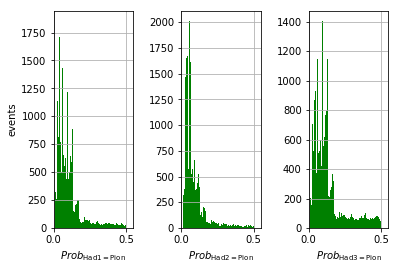

In [159]:
# plot the probability that a final state particle is a pion
plt.subplot(1,3,1)
plt.subplots_adjust(wspace=0.6)
real_probPi1 = real_data['H1_ProbPi'].hist(bins=100, color='g')
plt.xlim(0,0.55)
xlabel(r'$Prob_\mathrm{Had1=Pion}$')
ylabel('events')
plt.subplot(1,3,2)
real_probPi2 = real_data['H2_ProbPi'].hist(bins=100, color='g')
plt.xlim(0,0.55)
xlabel(r'$Prob_\mathrm{Had2=Pion}$')
plt.subplot(1,3,3)
real_probPi3 = real_data['H3_ProbPi'].hist(bins=100, color='g')
plt.xlim(0,0.55)
xlabel(r'$Prob_\mathrm{Had3=Pion}$')
plt.savefig('sim_ProbPi_hist.png')

Berechnet nun die invariante Masse der B Mesonen und plottet diese in ein Histogramm. Welche Unterschiede zeigt die Verteilung im Vergleich zu den simulierten Daten? Versucht diese Unterschiede zu erklären.

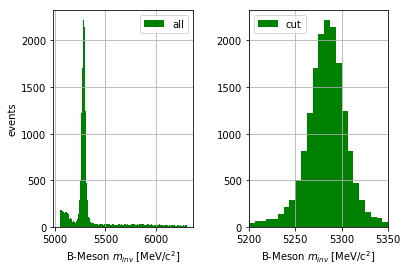

In [160]:
# calculate variables for the energy of the kaons
real_data['H1_P'] = np.sqrt(real_data['H1_PX']**2 + real_data['H1_PY']**2 + real_data['H1_PZ']**2)
real_data['H2_P'] = np.sqrt(real_data['H2_PX']**2 + real_data['H2_PY']**2 + real_data['H2_PZ']**2)
real_data['H3_P'] = np.sqrt(real_data['H3_PX']**2 + real_data['H3_PY']**2 + real_data['H3_PZ']**2)
real_data['H1_E'] = np.sqrt(real_data['H1_P']**2 + Minv_Kaon**2)
real_data['H2_E'] = np.sqrt(real_data['H2_P']**2 + Minv_Kaon**2)
real_data['H3_E'] = np.sqrt(real_data['H3_P']**2 + Minv_Kaon**2)
# calculate the energy of the B meson
real_data['B_E'] = real_data['H1_E'] + real_data['H2_E'] + real_data['H3_E']
# calculate the momentum components of the B meson 
real_data['B_PX'] = real_data['H1_PX'] + real_data['H2_PX'] + real_data['H3_PX'] 
real_data['B_PY'] = real_data['H1_PY'] + real_data['H2_PY'] + real_data['H3_PY'] 
real_data['B_PZ'] = real_data['H1_PZ'] + real_data['H2_PZ'] + real_data['H3_PZ'] 
# and the magnitude of the momentum of the B meson
real_data['B_P'] = np.sqrt(real_data['B_PX']**2 + real_data['B_PY']**2 + real_data['B_PZ']**2) 
# calculate the B meson invariant mass
real_data['B_M'] = np.sqrt(real_data['B_E']**2 - real_data['B_P']**2)
# plot the B meson invariant mass in a histogram
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
real_M_B = real_data['B_M'].hist(bins=200, color='g', label='all')
xlabel(r'B-Meson $m_{inv}$ [MeV/c$^2$]')
plt.legend()
ylabel('events')
plt.subplot(1,2,2)
real_M_B = real_data['B_M'].hist(bins=200, color='g', label='cut')
xlabel(r'B-Meson $m_{inv}$ [MeV/c$^2$]')
plt.xlim(5200,5350)
plt.legend()
plt.savefig('real_Bmes_M.png')
Mass_Cut = real_data[(real_data['B_M']>5200) & (real_data['B_M']<5350)]
Prod_Asym = real_data.query('B_M > 5400')

Experimentiert mit verschiedenen Schnitten und beobachtet, wie verschiedenen Schnitte die Verteilung der invarianten Masse verändern. Ihr solltet für die folgenden Aufgaben ein Set von Schnitten auswählen, das möglich viel Signal erhält und möglichst viel Untergrund verwirft.
Nach der Selektion mit Hilfe der Teilchenidentifikation könnt ihr auch nun auch mit Schnitten den B Meson Massen Peak isolieren und so den Untergrund mit hohen und niedrigen Massen entfernen.

### Hinweis: Vorselektions Beispiel

Dieser String zeigt euch die passende Syntax und lässt sich als guter Ausgangspunkt für die Selektion verwenden.

In [161]:
# preselection = "H1_ProbPi < 0.5 & H2_ProbPi < 0.5 & H3_ProbPi < 0.5 & H1_ProbK > 0.5 & H2_ProbK > 0.5 & H3_ProbK > 0.5 & !H1_isMuon & !H2_isMuon & !H3_isMuon"


# Suche nach globalen Materie-Antimaterie Unterschieden

In diesem Abschnittwerdet ihr anfangen Materie-Antimaterie Unterschiede (CP Verletzung) zu untersuchen. Das Attribut 'global' bedeutet in diesem Kontext, dass der gesamte kinematische (Energie und Impuls) Bereich der Tochter Kaonen betrachtet wird. Später werdet ihr noch nach 'lokalen' Unterschieden in verschiedenen kinematischen Bereichen der B Meson Zerfälle suchen.

## Ziele:
* Berechnet die globale CP Asymmetrie
* Bestimmt die statistische Unsicherheit
* Erkennt, ob sich eine CP Verletzung beobachten lässt

Um Unterschiede im Verhalten von Materie und Antimaterie sichtbar zu machen, wollen wir B<sup>+</sup> Mesonen mit ihren B<sup>-</sup> Antiteilchen vergleichen. Verwendet die zu Verfügung stehenden Ladungsinformationen (`H1_Charge`, `H2_Charge` und `H3_Charge`) um zwischen B<sup>+</sup> und B<sup>-</sup> zu unterscheiden.

In [162]:
# make a variable for the charge of the B mesons
Mass_Cut['B_Charge']= Mass_Cut['H1_Charge']+Mass_Cut['H2_Charge']+Mass_Cut['H3_Charge']
Prod_Asym['B_Charge']= Prod_Asym['H1_Charge']+Prod_Asym['H2_Charge']+Prod_Asym['H3_Charge']

Zählt nun die Anzahl (N<sup>+</sup> und N<sup>-</sup>) an Ereignissen mit einem Zerfall des jeweiligen Teilchens und bestimmt auch deren Differenz.

In [163]:
# make variables for the numbers of positive and negative B mesons
N_Plus= np.sum(Mass_Cut['B_Charge']==1)
N_Minus= np.sum(Mass_Cut['B_Charge']==-1)
N_Diff = N_Plus-N_Minus
print(N_Plus, N_Minus)
print(N_Diff)

8762 7923
839


Um die Asymmetrie zu berechnen könnt ihr die folgende Formel verwenden:

<latex>$A = \frac{N^+ - N^-}{N^+ + N^-}$</latex>

In [164]:
# calculate the value of the asymmetry, by using the formula above, and then print it
A = N_Diff / (N_Plus + N_Minus)
print(A)

0.05028468684447108


### Hinweise

**Zwischen B<sup>+</sup> und B<sup>-</sup> unterscheiden**

 - Ladung ist eine erhaltene Größe. Die Ladung des $B$ Meson entspricht der Gesamtladung der drei Töchter.
 - Ihr könnt ` len(real_data.query('B_Charge == charge'))` verwenden um die Zahl an Mesonen zu bestimmen, deren `B_Charge` mit der Ladung `charge` (`1` oder `-1`) übereinstimmt.

### Bestimmung der Signifikanz der Abweichung

Ihr müsst nun die statstische Unsicherheit auf die berechnete Asymmetrie bestimmen. Dies könnt ihr mit folgender Formel:

<latex>$\sigma_A = \sqrt{\frac{1-A^2}{N^+ + N^-}}$</latex>

Die Signifikanz des Ergebnisses wird bestimmt, indem der ermittelte Wert durch seine Unsicherheit geteilt wird. Ein Wert von mehr als drei Standardabweichungen $\sigma$ wird in der Teilchenphysik als "Hinweis" deklariert, ein Wert von mehr als $5\sigma$ als "Beobachtung" oder "Entdeckung" betrachtet.

In [165]:
# calculate the statistical significance of your result and print it
Sigma_A = np.sqrt( (1-A**2) / (N_Plus+N_Minus) )
print('Sigma_A:', Sigma_A)
Sig = A/Sigma_A
print('A/Sigma_A:', Sig)

Sigma_A: 0.007731916078002671
A/Sigma_A: 6.503522068421201


**Glückwunsch!** Ihr habt nun eure erste Suche nach CP Verletzung durch geführt.

Bisher habt ihr lediglich die statistische Unsicherheit auf die Messung berücksichtigt. Es gibt jedoch bei solchen Messungen auch noch weitere, systematische Unsicherheiten.
Berücksichtigt nun zusätzlich eine systematische Unsicherheit für eine Produktionsasymmetrie und berechnet erneut die Signifikanz.


In [166]:
N_Plus_PA= np.sum(Prod_Asym['B_Charge']==1)
N_Minus_PA= np.sum(Prod_Asym['B_Charge']==-1)
N_Diff_PA = N_Plus_PA-N_Minus_PA
A_PA = N_Diff_PA / (N_Plus_PA + N_Minus_PA)
print('A_prod_asym:',A_PA)
Sigma_A_PA = np.sqrt( (1-A_PA**2) / (N_Plus_PA+N_Minus_PA) )
print('Sigma_A_PA:', Sigma_A_PA)
A_PA_korr = A/np.sqrt(A_PA**2 + Sigma_A**2)
A_PA_annahme = A/np.sqrt(0.01**2 + Sigma_A**2)
print('A/(syst. & stat. Unsicherheit):', A_PA_korr)
print('A/(syst.(0.01) & stat. Unsicherheit):',A_PA_annahme)

A_prod_asym: 0.02724575128135959
Sigma_A_PA: 0.01641827221544216
A/(syst. & stat. Unsicherheit): 1.7754884026812339
A/(syst.(0.01) & stat. Unsicherheit): 3.9780579758194285


# Dalitz Plots und Zweikörper-Resonanzen
## Ziele:
* Erzeugt Dalitz Plots mit den simulierten und mit den echten Daten
* Verwendet eine Sortierung um die Dalitz Plots deutlicher zu machen
* Identifiziert Zweikörper-Resonanzen in den Dalitz Plots

An dieser Stelle wollen wir eine wichtige Technik für die Analyse von Dreikörperzerfällen, in diesem Fall dem Zerfall der geladenen B Mesonen in drei Kaonen, einführen. Diese ist als Dalitz Plot bekannt.

Der Zerfall der B Mesonen kann entweder direkt in den Dreikörper Endzustand stattfinden oder unter zwischenzeitlicher Erezugung eines weiter zerfallenden Teilchens. So kann der Zerfall B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> durch den Zerfall B<sup>+</sup> → K<sup>+</sup>R<sup>0</sup> mit einer Resonanz eines ungeladenen Teilchens, das seinerseits weiter nach R<sup>0</sup> → K<sup>+</sup>K<sup>-</sup> zerfällt. Dalitz Plots  können genutzt werden um diese Zwischenresonanzen als Bänder im Dalitz Plot sichtbar zu machen.

Die Kinematik eines Dreikörperzerfalles kann vollständig unter Verwendung zweier Variablen beschrieben werden. Die Energien und Impulse der drei Kaonen sind nicht unabhängig voneinander, da sie alle aus dem selben B Meson stammen, dessen Energie und Impuls erhalten bleiben. Die Achsen der Dalitz Plots beschreiben gewöhnlich die Quadrate der invarianten Massen von zwei Paaren aus Endzustandsteilchen. Auf diese Weise entstehen 2D Plots, deren Dichteverteilung verschiedene Strukturen aufweisen können.

In unserem Zerfall B<sup>+</sup> → K<sup>+</sup><sub>1</sub>K<sup>+</sup><sub>2</sub>K<sup>−</sup><sub>3</sub> sind unsere Kaonen nummeriert um sie zu unterscheiden. So gibt es drei möglich Kombinationen von Endzustandsteilchen zu Zweikörper Resonanzen: R<sup>0</sup><sub>1</sub> → K<sup>+</sup><sub>1</sub>K<sup>-</sup><sub>2</sub>, R<sup>++</sup><sub>2</sub> → K<sup>+</sup><sub>1</sub>K<sup>+</sup><sub>3</sub> und R<sup>0</sup><sub>3</sub> → K<sup>-</sup><sub>2</sub>K<sup>+</sup><sub>3</sub>. 

Die mögliche Resonanz R<sup>++</sup><sub>2</sub> wäre eine doppelt geladenen Resonanz. Eine solche wird für Mesonen nicht erwartet, da es sich bei Mesonen um Teilchen aus einem Quark und einem Anti-Quark handelt, deren Ladung nicht zu dem Wert 2 addiert werden können.

Die ungeladenen R<sup>0</sup><sub>1</sub> und R<sup>0</sup><sub>3</sub> Resonanzen sind jedoch ohne Weiteres möglich. Daher sollt ihr nun die invarianten Massen für diese Kombinationen berechnen. Anschließend sollt ihr die Quadrate dieser Massen in einem 2D Histogramm als Dalitz Plot auftragen.

Es wird empfohlen mit den simulierten Daten zu beginnen. Diese enthalten keine Zwischenresonanzen. Daher wird in den Dalitz Plots eine gleichmäßige Dichteverteilung im physikalisch erlaubten Bereich von Energie und Impulsen erwartet.
	

In [167]:
# calculate the invariant masses for each possible hadron pair combination
# calculate the energy of the X meson
sim_data['X12_E'] = sim_data['H1_E'] + sim_data['H2_E']
sim_data['X23_E'] = sim_data['H2_E'] + sim_data['H3_E']
# calculate the momentum components of the X meson 
sim_data['X12_PX'] = sim_data['H1_PX'] + sim_data['H2_PX'] 
sim_data['X12_PY'] = sim_data['H1_PY'] + sim_data['H2_PY'] 
sim_data['X12_PZ'] = sim_data['H1_PZ'] + sim_data['H2_PZ'] 
sim_data['X23_PX'] = sim_data['H2_PX'] + sim_data['H3_PX'] 
sim_data['X23_PY'] = sim_data['H2_PY'] + sim_data['H3_PY'] 
sim_data['X23_PZ'] = sim_data['H2_PZ'] + sim_data['H3_PZ'] 
# and the magnitude of the momentum of the X meson
sim_data['X12_P'] = np.sqrt(sim_data['X12_PX']**2 + sim_data['X12_PY']**2 + sim_data['X12_PZ']**2)
sim_data['X23_P'] = np.sqrt(sim_data['X23_PX']**2 + sim_data['X23_PY']**2 + sim_data['X23_PZ']**2)
# calculate the X meson invariant mass
sim_data['X12_M'] = np.sqrt(sim_data['X12_E']**2 - sim_data['X12_P']**2)
sim_data['X23_M'] = np.sqrt(sim_data['X23_E']**2 - sim_data['X23_P']**2)

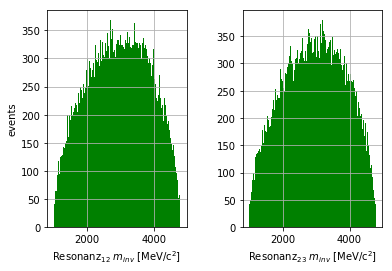

In [168]:
# plot the invariant mass for one of these combinations 
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
sim_M_X13 = sim_data['X12_M'].hist(bins=200, color='g')
xlabel(r'Resonanz$_{12}$ $m_{inv}$ [MeV/c$^2$]')
ylabel('events')
plt.subplot(1,2,2)
sim_M_X23 = sim_data['X23_M'].hist(bins=200, color='g')
xlabel(r'Resonanz$_{23}$ $m_{inv}$ [MeV/c$^2$]')
#plt.xlim(5200,5350)
plt.savefig('sim_Xmes_M.png')

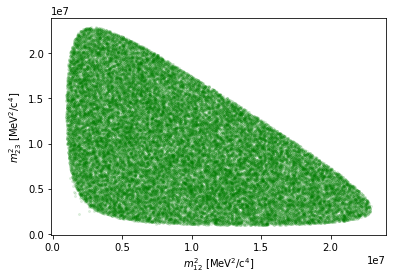

In [169]:
# make a Dalitz plot with labelled axes for the simulation data
dalitz_sim = scatter(sim_data['X12_M']**2, sim_data['X23_M']**2, s = 4, alpha=0.1, color='g')
xlabel(r'$m_{12}^2$ [MeV$^2$/c$^4$]')
ylabel(r'$m_{23}^2$ [MeV$^2$/c$^4$]')
plt.savefig('dalitz_sim.png')

### Hinweise

**Berechnung der invarianten Massen** - Nutzt die selbe Technik wie für das B Meson. Verwendet dabei jedoch nur zwei anstelle der drei Endzustandsteilchen
**Dalitz Plot plotten** - Ihr könnt die `scatter()` Funktion der `matplotlib` Bibliothek verwenden oder in der Beispiel Analyse nachsehen. Vergesst nicht das Quadrat der Zweikörpermasse zu verwenden.

## Dalitz Plot mit echten Daten
Erstelt nun einen Dalitz Plot für die echten Daten. Kontrolliert, dass eure gebildeten Resonanzen R<sup>0</sup><sub>1</sub> und R<sup>0</sup><sub>3</sub> ungeladen sind.

In [170]:
# calculate the invariant masses for each possible hadron pair combination in the real data
# calculate the energy of the X meson
Mass_Cut['X12_E'] = Mass_Cut['H1_E'] + Mass_Cut['H2_E']
Mass_Cut['X13_E'] = Mass_Cut['H1_E'] + Mass_Cut['H3_E']
# calculate the momentum components of the X meson 
Mass_Cut['X12_PX'] = Mass_Cut['H1_PX'] + Mass_Cut['H2_PX'] 
Mass_Cut['X12_PY'] = Mass_Cut['H1_PY'] + Mass_Cut['H2_PY'] 
Mass_Cut['X12_PZ'] = Mass_Cut['H1_PZ'] + Mass_Cut['H2_PZ'] 
Mass_Cut['X13_PX'] = Mass_Cut['H1_PX'] + Mass_Cut['H3_PX'] 
Mass_Cut['X13_PY'] = Mass_Cut['H1_PY'] + Mass_Cut['H3_PY'] 
Mass_Cut['X13_PZ'] = Mass_Cut['H1_PZ'] + Mass_Cut['H3_PZ'] 
# and the magnitude of the momentum of the X meson
Mass_Cut['X12_P'] = np.sqrt(Mass_Cut['X12_PX']**2 + Mass_Cut['X12_PY']**2 + Mass_Cut['X12_PZ']**2)
Mass_Cut['X13_P'] = np.sqrt(Mass_Cut['X13_PX']**2 + Mass_Cut['X13_PY']**2 + Mass_Cut['X13_PZ']**2)
# calculate the X meson invariant mass
Mass_Cut['X12_M'] = np.sqrt(Mass_Cut['X12_E']**2 - Mass_Cut['X12_P']**2)
Mass_Cut['X13_M'] = np.sqrt(Mass_Cut['X13_E']**2 - Mass_Cut['X13_P']**2)

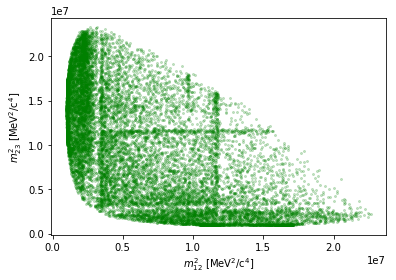

In [171]:
# make a Dalitz plot for the real data (with your preselection cuts applied)
# make a Dalitz plot with labelled axes for the simulation data
dalitz_real = scatter(Mass_Cut['X12_M']**2, Mass_Cut['X13_M']**2, s = 4, alpha=0.2, color='g')
xlabel(r'$m_{12}^2$ [MeV$^2$/c$^4$]')
ylabel(r'$m_{23}^2$ [MeV$^2$/c$^4$]')
plt.savefig('dalitz_real.png')

<div align="justify">Beschriftet auch die Achsen des Dalitz Plot. Vergleicht den Dalitz Plot der echten Daten mit den simulierten. Wo liegen die größten Unterschiede?
</div>

### Sortieren der Dalitz Variablen
Die Sichtbarkeit von Resonanzen in Dalitz kann noch weiter erhöht werden. Die verwendeten Resonanzen R<sup>0</sup><sub>1</sub> und R<sup>0</sup><sub>3</sub> sind beide aus der selben Sorte Teilchen, K<sup>+</sup>K<sup>-</sup>, zusammengesetzt. Daher haben sie ie selben Verteilungen.
Es ist hilfreich eine Sortierung in diese beiden Resonanzen zu bringen um zusätzliche Informationen zu gewinnen. Dazu verwenden sortieren wir die beiden Resonanzen in eine Kombination der Kaonen mit der jeweils höheren Masse R<sup>0</sup><sub>High</sub> und eine mit der dazu gehörenden niedrigeren Masse R<sup>0</sup><sub>Low</sub>. Werden die Massen dieser sortierten Kombinationen als Dalitz Variablen verwendet, wird der Dalitz Plot quasi in der Mitte "umgeklappt". Der nun deutlich kleinere kinematische Bereich enthält weiterhin die selbe Menge an Statistik. Die Ereignisdichte in dem Bereich wird daurch jedoch deutlich größer, sodass Strukturen deutlich besser zu erkennen sind. 



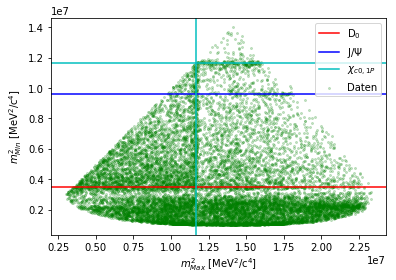

In [172]:
# make a new Dalitz plot with a mass ordering of the axes
Mass_Cut['X_Max'] = np.max((Mass_Cut['X12_M'], Mass_Cut['X13_M']),axis=0)
Mass_Cut['X_Min'] = np.min((Mass_Cut['X12_M'], Mass_Cut['X13_M']),axis=0)
dalitz_real = scatter(Mass_Cut['X_Max']**2, Mass_Cut['X_Min']**2, s = 4, alpha=0.2, color='g', label='Daten')
plt.axhline(1864**2, color = 'red', label=r'D$_0$')
plt.axhline(3096.9**2, color = 'blue', label=r'J/$\Psi$')
plt.axhline(3414.71**2, color = 'c', label=r'$\chi_{c0,1P}$')
plt.axvline(3414.71**2, color = 'c')
xlabel(r'$m_{Max}^2$ [MeV$^2$/c$^4$]')
ylabel(r'$m_{Min}^2$ [MeV$^2$/c$^4$]')
plt.legend()
plt.savefig('dalitz_real_MinMax.png')

### Hinweise

**Sortierung** - Ihr könnt die größere / kleinere Masse durch elementweises Vergleichen der bestimmten Massen R<sup>0</sup><sub>1</sub> und R<sup>0</sup><sub>3</sub> bestimmen. Dabei können auch die `numpy` Funktionen `numpy.min(a,b)` und `numpy.max(a,b)` helfen. Diese führen einen elementweisen Vergleich zwischen den Arrays `a` und `b` durch und geben einen Array mit den jeweiligen Minima/Maxima zurück.

### Gebinnter Dalitz Plot
Die Darstellung des Dalitz Plots lässt sich durch das Verwenden eines Binnings verbessern. Dazu könnt ihr die `hist2d()` Funktion verwenden um ein 2D Histogramm zu erstellen.

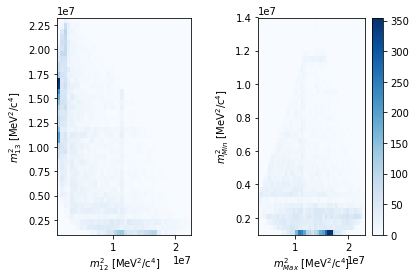

In [174]:
# plot a binned Dalitz Plot
# use colorbar() to make a legend for your plot at the side
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.5)
hist2d(Mass_Cut['X12_M']**2, Mass_Cut['X13_M']**2, bins=40)
xlabel(r'$m_{12}^2$ [MeV$^2$/c$^4$]')
ylabel(r'$m_{13}^2$ [MeV$^2$/c$^4$]')
plt.subplot(1,2,2)
hist2d(Mass_Cut['X_Max']**2, Mass_Cut['X_Min']**2, bins=40)
colorbar()
xlabel(r'$m_{Max}^2$ [MeV$^2$/c$^4$]')
ylabel(r'$m_{Min}^2$ [MeV$^2$/c$^4$]')
plt.savefig('binned_Dalitz.png')

## Zweikörper-Resonanzen

Ihr könnt nun den Dalitz Plot verwenden um Zwischenresonanzen zu beobachten. Diese Resonanzen bilden Bänder mit höherer Ereignisdichte in den Dalitz Plots. Mit Hilfe des PDG Booklets oder der [PDG Seite](http://pdg.lbl.gov/2015/tables/contents_tables.html) könnt ihr nun versuchen die entsprechenden Resonanzen zu identifizieren. Dazu sind die Massen, Zerfallsbreiten und jeweiligen Zerfallkanäle angegeben. Ihr sucht nach Mesonen, die in zwei geladene Kaonen K<sup>+</sup>K<sup>-</sup> zerfallen und die die zu den Bändern passenden Massen haben.

# Suche nach lokalen Materie-Antimaterie Unterschieden
## Ziele:
* Beobachtet Materie-Antimaterie Unterschiede (CP Verletzung) in bestimmten Regionen des Dalitz Plots der B<sup>+</sup> und B<sup>-</sup> Mesonen.
* Erzeugt Plots um die CP Verletzung in den entsprechenden Bereichen deutlich zu machen.

In einem vorherigen Abschnitt habt ihr bereits nach globaler CP Verletzung gesucht. Vermutlich hatte euer Ergebnis keine sehr hohe Signifikanz.

CP Verletzung kommt aus der Interferenz von verschiedenen Zerfallsketten mit unterschiedlichen zwischen Resonanzen in einen gemeinsamen Endzustand. Daher kann es vorkommen das die Stärke und das Vorzeichen der CP Verletzung in verschiedenen kinematischen Bereichen variiert. Daher werden wir nun die selbe Formel wie für die globale CP Verletzung nutzen

<latex>$A = \frac{N^+ - N^-}{N^+ + N^-}$</latex>

Diese wird jedoch auf unterschiedliche Bereiche im Dalitz Plot angewendet.


## Entfernen der Charm Resonanzen 

Diese hier durchgeführte Analyse ist darauf ausgelegt CP Verletzung in Charm-freien B Meson Zerfällen zu untersuchen.
Charm-frei bedeutet, dass in dem Zerfall kein charm Quark vorhanden ist. Die häufigsten Zerfälle von B Mesonen hängen jedoch mit dem Zerfall eines *b* Quarks in ein *c* Quark zusammen. Ein Großteil dieser Ereignisse lässt sich verwerfen, indem Ereignisse mit einem D<sup>0</sup> Meson (welches ein *c* Quark enthält) in der Zerfallskette entfernt.

In dem vorherigen Abschnitt habt ihr wahrscheinlich bereits eine D<sup>0</sup> Meson Resonanz in den Dalitz Plots identifizieren können. Nun sollt ihr alle Ereignisse die in dem entsprechenden kinematischen Bereich liegen verwerfen um diesen Anteil zu unterdrücken. Ihr könnt dies bereits in eurer Vorselektion tun und durch einfaches Ausführen der bisherigen Schritte die Veränderungen in den Dalitz Plots beobachten.

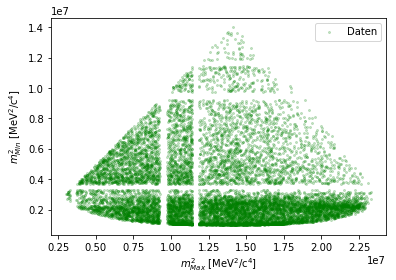

In [175]:
Mass_Cut_c = Mass_Cut[((Mass_Cut['X_Min']<1820) | (Mass_Cut['X_Min']>1920)) &
                     ((Mass_Cut['X_Max']<1820) | (Mass_Cut['X_Max']>1920)) &
                     ((Mass_Cut['X_Min']<3040) | (Mass_Cut['X_Min']>3120)) &
                     ((Mass_Cut['X_Max']<3040) | (Mass_Cut['X_Max']>3120)) &
                     ((Mass_Cut['X_Min']<3380) | (Mass_Cut['X_Min']>3440)) &
                     ((Mass_Cut['X_Max']<3380) | (Mass_Cut['X_Max']>3440)) ]

dalitz_real_c = scatter(Mass_Cut_c['X_Max']**2, Mass_Cut_c['X_Min']**2, s = 4, alpha=0.2, color='g', label='Daten')
xlabel(r'$m_{Max}^2$ [MeV$^2$/c$^4$]')
ylabel(r'$m_{Min}^2$ [MeV$^2$/c$^4$]')
plt.legend()
plt.savefig('dalitz_real_MinMax_ohnec.png')

## Vergleich der Dalitz Plots

Erzeugt seperate Dalitz Plots für B<sup>+</sup> und B<sup>-</sup> Zerfälle. Lokale CP verletzung sollte als Asymmetrie zwischen den beiden Plots sichtbar werden.
Damit die statistischen Fehler in den jeweiligen Bins nicht zu groß werden, muss in jedem Bin eine ausreichend große Menge an Ereignissen sein. Daher werdet ihr vermutlich ein gröberes Binning benötigen als bei den Dalitz Plots, mit denen ihr nach den Resonanzen gesucht habt. Eine geeignete Ausgangsbreite für die Bins dürfte in dem Bereich einiger weniger $\text{GeV}^2/\text{c}^4$ liegen.

In [176]:
# make a Dalitz plot for the B+ events
Mass_Cut_c_Bp = Mass_Cut_c[(Mass_Cut_c['B_Charge'] == 1)]
Mass_Cut_c_Bm = Mass_Cut_c[(Mass_Cut_c['B_Charge'] == -1)]

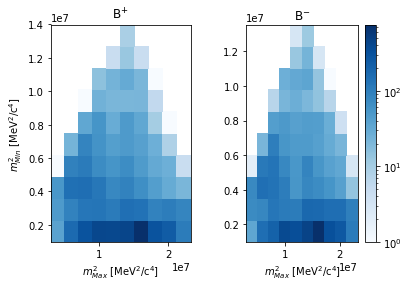

In [177]:
import matplotlib.colors as colors
# make a Dalitz plot for the B- events
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
hist_Bp, xedge_Bp, yedge_Bp, image = hist2d(Mass_Cut_c_Bp['X_Max']**2, Mass_Cut_c_Bp['X_Min']**2, bins=10, norm=colors.LogNorm())
xlabel(r'$m_{Max}^2$ [MeV$^2$/c$^4$]')
ylabel(r'$m_{Min}^2$ [MeV$^2$/c$^4$]')
plt.title(r'B$^{+}$')
plt.subplot(1,2,2)
hist_Bm, xedge_Bm, yedge_Bm, image = hist2d(Mass_Cut_c_Bm['X_Max']**2, Mass_Cut_c_Bm['X_Min']**2, bins=10, norm=colors.LogNorm())
colorbar()
xlabel(r'$m_{Max}^2$ [MeV$^2$/c$^4$]')
plt.title(r'B$^{-}$')
plt.savefig('Bp_Bm_Dalitz.png')

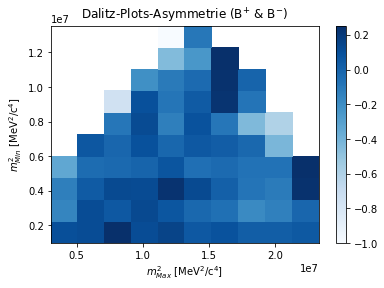

In [178]:
# Make a plot showing the asymmetry between these two Daltz plots
# i.e. calculate the asymmetry between each bin of the B+ and B- Dalitz plots and show the result in another 2D plot
A_Bpm = (hist_Bp - hist_Bm)/(hist_Bp + hist_Bm)
#A_Bpm[np.isnan(A_Bpm)] = 0
pcolor(xedge_Bm, yedge_Bm, A_Bpm.T)
colorbar()
xlabel(r'$m_{Max}^2$ [MeV$^2$/c$^4$]')
ylabel(r'$m_{Min}^2$ [MeV$^2$/c$^4$]')
plt.title(r'Dalitz-Plots-Asymmetrie (B$^{+}$ & B$^{-}$)')
plt.savefig('Asymm_Dalitz.png')

Die Beobachtung einer großen Asymmetrie in einer bestimmten Region des Plots bedeutet nicht unbedingt, dass dor auch CP verletzung beobachtbar ist. Wenn nur eine sehr geringe Anzahl an Ereignissen in diesem Bereich liegt, kann die statistische Unsicherheit so groß werden, dass auch eine große Asymmetrie kompatibel mit Null wird.

Ihr könnt die statistische Unsicherheit in jedem Bin mit der bereits zuvor für die globale Asymmetrie verwendeten Formel berechnen. Anschließend könnt ihr einen Plot erzeugen, der die Unsicherheit in jedem Bin zeigt.

Das Teilen der Bineinträge des Asymmetrie Plots durch die Bineinträge des Unsicherheitsplots liefert die Signifikanz der CP Verletzung in jedem Bin. Das Plotten der Signifikanz macht es möglich Regionen auszuwählen, in denen CP Verletzung vorliegt.

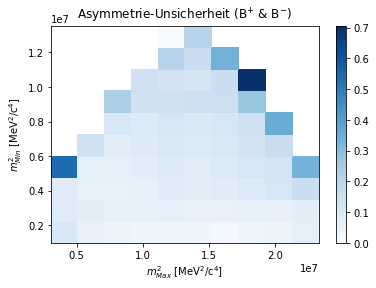

In [179]:
# Make a plot showing the uncertainty on the asymmetry 
#Asig = abs(A / Aerr)
Sigma_A_Bpm = np.sqrt((1-A_Bpm**2)/(hist_Bp+hist_Bm))
#print(Sigma_A_Bpm)
pcolor(xedge_Bm, yedge_Bm, (Sigma_A_Bpm).T)
colorbar()
xlabel(r'$m_{Max}^2$ [MeV$^2$/c$^4$]')
ylabel(r'$m_{Min}^2$ [MeV$^2$/c$^4$]')
plt.title(r'Asymmetrie-Unsicherheit (B$^{+}$ & B$^{-}$)')
plt.savefig('Asymm_Fehler_Dalitz.png')

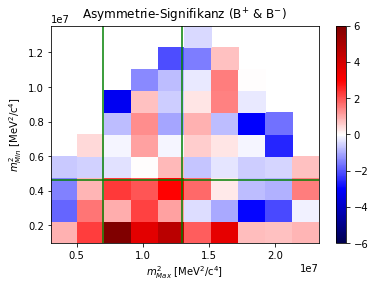

In [193]:
# Make a plot showing the statistical significance of the asymmetry
pcolor(xedge_Bm, yedge_Bm, (A_Bpm/Sigma_A_Bpm).T,cmap='seismic')
colorbar()
xlabel(r'$m_{Max}^2$ [MeV$^2$/c$^4$]')
ylabel(r'$m_{Min}^2$ [MeV$^2$/c$^4$]')
plt.title(r'Asymmetrie-Signifikanz (B$^{+}$ & B$^{-}$)')
plt.savefig('Asymm_Sig_Dalitz.png')

plt.axvline(2650**2, color = 'g')
plt.axvline(3600**2, color = 'g')
plt.axhline(2150**2, color = 'g')
plt.clim(-6,6)



## Beobachtung der CP Verletzung

Die vorherigen Untersuchungen der Asymmetrie und ihrer Signifikanz sollte es auch nun ermöglichen eine Region im Dalitz Plot auszuwählen, die Anzeichen für signifikante CP Verletzung einer gewissen Größe aufweist. Diese lässt sich durch eine Ansammlung zusammenhängender Bins mit signifikanter positiver (oder negativer) Asymmetrie. Eventuell hilft es das Binning zu variieren um die optimale Region auszuwählen.

Ihr könnt nun die entsprechende kinematische Region in euren Daten selektieren. Anschließend plottet ihr mit einem einfachen 1D Histogramm die invarianten Massenverteilungen für die B<sup>+</sup> und die B<sup>-</sup> Mesonen, so wie ihr es bereits bei der globalen Asymmetrie getan habt. Diesmal liegen die Ereignisse jedoch ausschließlich in der kinematischen Region von Interesse. Nun wiederholt das Vorgehen zur Bestimmung der CP Verletzung für die selektierten Daten, zählt die jeweilige Ereignisrate, berechnet die Asymmetrie, ihre statistische Unsicherheit und die daraus folgende Signifikanz der gemessenen CP Verletzung.

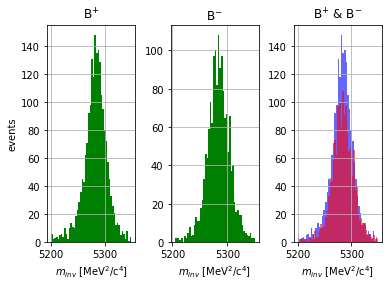

In [196]:
# Make a plot showing the invariant mass of the B+ meson particles
# using events from a region of the Dalitz plot showing sizeable CP asymmetries
#Mass_Cut_c_Asym = Mass_Cut_c[((Mass_Cut_c['X_Min']<1500) & (Mass_Cut_c['X_Max']>2650) & (Mass_Cut_c['X_Max']<4150))]
Mass_Cut_c_Asym_Bp = Mass_Cut_c_Bp[((Mass_Cut_c_Bp['X_Min']<2150) & (Mass_Cut_c_Bp['X_Max']>2650) & (Mass_Cut_c_Bp['X_Max']<3600))]
Mass_Cut_c_Asym_Bm = Mass_Cut_c_Bm[((Mass_Cut_c_Bm['X_Min']<2150) & (Mass_Cut_c_Bm['X_Max']>2650) & (Mass_Cut_c_Bm['X_Max']<3600))]
plt.subplot(1,3,1)
plt.subplots_adjust(wspace=0.4)
Mass_Cut_c_Asym_Bp['B_M'].hist(bins=50, color= 'g')
xlabel(r'$m_{inv}$ [MeV$^2$/c$^4$]')
ylabel(r'events')
plt.title(r'B$^{+}$')
plt.subplot(1,3,2)
Mass_Cut_c_Asym_Bm['B_M'].hist(bins=50, color= 'g')
xlabel(r'$m_{inv}$ [MeV$^2$/c$^4$]')
plt.title(r'B$^{-}$')
plt.subplot(1,3,3)
Mass_Cut_c_Asym_Bp['B_M'].hist(bins=50, color= 'b', alpha= 0.6, label=r'B$^{+}$')
Mass_Cut_c_Asym_Bm['B_M'].hist(bins=50, color= 'r', alpha= 0.6, label=r'B$^{-}$')
xlabel(r'$m_{inv}$ [MeV$^2$/c$^4$]')
plt.title(r'B$^{+}$ & B$^{-}$')
plt.savefig('Bp_Bm_invarianteMasse.png')

In [197]:
# Make a plot showing the invariant mass of the B- meson particles using events from the same region
N_final_p = len(Mass_Cut_c_Asym_Bp)
N_final_m = len(Mass_Cut_c_Asym_Bm)
A_final = (N_final_p -N_final_m)/(N_final_p +N_final_m)
Sigma_A_final = np.sqrt( (1-A_final*2) / (N_final_p+N_final_m))
Sign_final = A_final/(np.sqrt(A_PA**2 + Sigma_A_final**2))
Sign_final_corr = A_final/(np.sqrt(0.01**2 + Sigma_A_final**2))
print(Sign_final)
print(Sign_final_corr)

4.472707769250535
7.888006096859131


**Glückwunsch!** Ihr solltet nun erfolgreich signifikante Hinweise auf CP Verletzung beobachtet haben. Eure Plots sollten deutlich zeigen, dass sie Zerfallsraten von Teilchen und Antiteilchen in verschiedenen kinematischen Bereichen unterschiedlich sind. Eventuell wollt ihr eure Ergebnisse mit denen der LHCb Collaboration vergleichen die in diesem [Paper](http://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-027.html) veröffentlicht sind.

# Weitere mögliche Analysen

Die hier verwendeten Daten umfassen ein vollständiges Set von am LHCb Experiment aufgezeichneten Daten für Zerfälle von geladenen B Mesonen in drei Endzustandsspuren. Dieser Datensatz ist auch noch für zwei weitere wichtige Veröffentlichungen verwendet worden (zu finden [hier](http://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-027.html) und [hier](http://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-051.html)).

Es gibt auch noch weitere Möglichkeiten diese Analyse auszuweiten. Die Folgenden Möglichkeiten werden im Weiteren diskutiert:
<ul>
<li>Zusätzliche Elemente für die Analyse von B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> </li>
<li>Ähnliche Analysen auf diesem Datensatz</li>
</ul>

## Erweiterungen der Analyse

### Systematische Unsicherheiten
In dieser Analyse sind nur die statistischen Unsicherheiten berücksichtigt worden. Diese ist durch die limitierte Anzahl an Ereignissen bedingt. Darüberhinaus gibt es auch noch [Systematische Unsicherheiten](https://en.wikipedia.org/wiki/Observational_error#Systematic_versus_random_error), die durch Fehlannahmen in der Messung bedingt werden. Drei mögliche Quellen für systematische Unsicherheiten in dieser Analyse werden im Folgenden erläuter:
<ul>
<li> Produktions-Asymmetrie. Der LHC ist ein Proton-Proton Collider. Daher ist der Ausgangszustand der Kollision nicht Materie-Antimaterie symmetrisch. Somit werden B<sup>+</sup> und B<sup>-</sup> Mesonen auch nicht in exakt gleicher Zahl produziert. Diese kleine Produktions-Asymmetrie beträgt etwa 1% und kann mit Daten gemessen werden, wie in dem entsprechenden Paper diskutiert wird.</li>
<li> Detektions-Asymmetrie. Der LHCb Detektor kann unterschieldich effizient im Detektieren der B<sup>+</sup> und B<sup>-</sup> Endzustände sein. Dies ist dadurch bedingt, dass positiv und negativ geladenen Kaonen im Magnetfeld in unterschiedliche Richtungen abgelenkt werden. Falls der Detektor nun in bestimmten Bereichen unterschiedlich effizient arbeitet, kommt es zu unterschiedlichen Effizienzen für K<sup>+</sup> und K<sup>-</sup> und daher auch für B<sup>+</sup> und B<sup>-</sup>. Aus diesem Grund wird die Magnetfeld Polarität gelegentlich umgekehrt. Die verwendeten Daten enthalten beide Polaritäten. Daher sollte diese Asymmetrie zum großen Teil ausgelöscht werden.
Ihr könnt jedoch auch die Daten der jeweiligen Polarität einzeln laden und die CP Asymmetrie für die jeweilige Polarität einzeln und auch ihren Unterschied bestimmen. </li>
<li>Analyse Techniken. Die verwendeten Techniken können auch Einfluss nehmen. In dieser Analyse wurde eine Vereinfachte Technik zum Verwerfen der Untergrundereignisse angewandt. Dabei wurde die Auswirkung von den verbleibenden Untergrundereignissen nicht weiter betrachtet. </li>
</ul>

### Verwendung der Massenseitenbänder

Eine Quelle von Untergrund ist die zufällige Kombination von Spuren zu einem Kandidaten, der signalartige Eigenschaften hat. Dieser Untergrund wird zwar keinen Peak in den Daten verursachen, aber eine stetige Verteilung zu der wahren Massen Verteilung hinzufügen. Das Betrachten der Massenverteilung abseits des Massenpeaks ermöglicht eine Abschätzung, wie groß der Anteil an diesem kombinatorischen Untergrund im Signal Bereich ist.

### Verteilungen Fitten

Alternativ kann auch die Verteilung von Untergund und Signal in der B Masse gefittet werden. Auf diese Weise kann auch die Anzahl der jeweiligen Ereignisse bestimmt werden. Wie dies funktioniert kann auch dem Referenz LHCb Paper entnommen werden. Die entsprechenden Fits werden meist mit dem [CERN root framework](https://root.cern.ch/) durchgeführt.

## Weitere Analysen

In den LHCb Papern, die diese Daten verwendeten, sind vier verschiedene Zerfallskanäle des geladenen B Meson untersucht worden. Jede dieser Analysen könnt ihr auch mit diesen Daten durchführen.
<ul>
<li>B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> (und ladungskonjugierte). Dies ist die Analyse die hier durchgeführt worden ist. Dieser Zerfallskanal hat den geringsten Untergrund. Daher nimmt unser vereinfachter Umgang mit dem Untergrund hier den geringsten Einfluss.</li>
<li>B<sup>+</sup> → &pi;<sup>+</sup>&pi;<sup>+</sup>&pi;<sup>−</sup> (und ladungskonjugierte). Bei dieser Analyse befinden sich drei Pionen im Endzustand. Da Pionen die häufigsten am LHC erzeugten Hadronen sind, gibt es hier einen signifikant größeren Untergrund. Daher sollte bei dieser Analyse ein Verfahren zum Umgang mit dem verbleibenden Untergrund hinzugefügt werden.</li>
<li>B<sup>+</sup> → K<sup>+</sup>&pi;<sup>+</sup>&pi;<sup>−</sup> (und ladungskonjugierte). In diesem Fall befinden sich sowohl Kaonen als auch Pionen im Endzustand. Daher muss hier zunächst entschieden werden, welcher der Kandiaten am ehesten das Kaon ist, und die Selektion daran angepasst werden.</li>
<li>B<sup>+</sup> → &pi;<sup>+</sup>K<sup>+</sup>K<sup>−</sup> (und ladungskonjugierte). Dieser Zerfallskanal hat zusätzlich ein schlechteres Verhältnis von Signal zu Untergrund.</li>
</ul>